# ACSE-7 (Inversion and Optimisation)  <a class="tocSkip"></a>

## Lecture 6: Constrained Optimisation  <a class="tocSkip"></a>
In this lecture we will take a look at how to add constraints to our optimisation problems and the algorithms to solve them. Equality constraints can be handled using a Lagrange multiplier and defining a Lagrangian. The most general case (which is optional material) with both equality and inequality constraints leads to the KKT equations. The technique of imposing an equality constraint via Lagrange multipliers will also prove useful in our discussion of adjoint methods in the next lecture.

### Important concepts: <a class="tocSkip"></a>

- convexity: convex domains, functions and optimisation problems
- imposing equality constraints via Lagrange multipliers

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Constraints-and-Convexity" data-toc-modified-id="Constraints-and-Convexity-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Constraints and Convexity</a></span><ul class="toc-item"><li><span><a href="#Convex-and-Concave-Sets-and-Functions" data-toc-modified-id="Convex-and-Concave-Sets-and-Functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Convex and Concave Sets and Functions</a></span></li><li><span><a href="#Convex-Functions-and-the-Hessian" data-toc-modified-id="Convex-Functions-and-the-Hessian-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Convex Functions and the Hessian</a></span></li></ul></li><li><span><a href="#Equality-Constraints-and-Lagrange-Multipliers" data-toc-modified-id="Equality-Constraints-and-Lagrange-Multipliers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Equality Constraints and Lagrange Multipliers</a></span></li><li><span><a href="#Linear-Programming-(*)" data-toc-modified-id="Linear-Programming-(*)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Linear Programming (*)</a></span></li><li><span><a href="#Inequality-Constraints-and-the-KKT-conditions-(*)" data-toc-modified-id="Inequality-Constraints-and-the-KKT-conditions-(*)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Inequality Constraints and the KKT conditions (*)</a></span></li><li><span><a href="#Quadratic-Programming" data-toc-modified-id="Quadratic-Programming-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Quadratic Programming</a></span></li><li><span><a href="#Summary-of-Constrained-Optimisation-Algorithms" data-toc-modified-id="Summary-of-Constrained-Optimisation-Algorithms-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary of Constrained Optimisation Algorithms</a></span><ul class="toc-item"><li><span><a href="#Sequential-Quadratic-Programming" data-toc-modified-id="Sequential-Quadratic-Programming-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Sequential Quadratic Programming</a></span></li><li><span><a href="#Interior-Point/Penalty-Methods" data-toc-modified-id="Interior-Point/Penalty-Methods-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Interior Point/Penalty Methods</a></span></li></ul></li><li><span><a href="#Solving-the-KKT-system-(*)" data-toc-modified-id="Solving-the-KKT-system-(*)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Solving the KKT system (*)</a></span></li><li><span><a href="#Newton's-method-with-equality-constraints-(*)" data-toc-modified-id="Newton's-method-with-equality-constraints-(*)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Newton's method with equality constraints (*)</a></span></li><li><span><a href="#Inequality-Constraints:-SQP-and-SUMT-(*)" data-toc-modified-id="Inequality-Constraints:-SQP-and-SUMT-(*)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Inequality Constraints: SQP and SUMT (*)</a></span></li><li><span><a href="#List-of-Definitions" data-toc-modified-id="List-of-Definitions-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>List of Definitions</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# scipy's optimization
import scipy.optimize as sop
import scipy.linalg as sl
import scipy.sparse as sp
import scipy.sparse.linalg as spl

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# font sizes for plots
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

In [2]:
%%html
<style type="text/css">
a.definition {
    color: blue;
    font-style: italic;
    font-weight: bold;
}
div.optional {
    background-color: #f0f8ff;
    border-color: #e0f0ff;
    border-left: 5px solid #e0f0ff;
    padding: 0.5em;
}
td.caption {
    text-align: center;
    font-weight: bold;
}
</style>

<font size="1pt">Some $\LaTeX$ definitions hidden in this cell (double-click to reveal)</font>
$
\newcommand\vec[1]{\mathbf{#1}}
\newcommand\vlam{\boldsymbol{\lambda}}
\newcommand\vmu{\boldsymbol{\mu}}
\newcommand\mat[1]{\underline{\mathbf{#1}}}
\newcommand\R{\mathbb{R}}
\newcommand\todo[1]{\textcolor{red}#1}
$

# Constraints and Convexity
So far we have looked at optimisation problems where we try to find the minimum of a function $f:\R^n \to \R$. This means we have $n$ indepent variables and we allow them to take any value. In many practical problems however, there are further constraints on these inputs, for instance not all input values are possible, the function $f$ might not be defined on all of $\R^n$, or we are only interested in the minimizer of $f$ in a subset of $\R^n$.

There are two types of constraints to consider:

* <a class="definition" href="#definitions" id="Inequalityconstraints">Inequality constraints</a>. These can be written $h(\vec x) \leq 0$ where $h$ is a function $h:\R^n \to \R$ that should be negative to be satisfied. Typically, there are multiple of these constraints that all need to be satisfied, so we use a function $h:\R^n\to\R^q$ with $q$ being the number of inequality constraits, and write $\vec h(\vec x)\leq 0$. These restrict the input parameters to a subset 

$$
  X_h = \{\vec x \in \R^n | h(\vec x)\leq 0\}
$$

which typically still has the same number of dimensions.

* <a class="definition" href="#definitions" id="Equalityconstraints">Equality constraints</a>. These take the form $g(\vec x)=0$ for a function $g:\R^n\to\R^p$, where $p$ is the number of equality constraints, and restrict the input parameters to a subset $X\subset \R^n$, which typically (but not always) has a lower dimension $n-p$:

$$
   X_g = \{ x \in\R^n | g(\vec x) = 0\}
$$

We can also combine inequality and equality constraints. Points that satisfy all $p$ equality and $q$ inequality constraints are called <a class="definition" href="#definitions" id="feasiblepoints">feasible points</a>, and the set of these points, $X_f \cap X_g$, the <a class="definition" href="#definitions" id="feasiblesubset">feasible subset</a>.

### Examples: <a class="tocSkip"></a>
- In two dimensions, to restrict the domain to points within the unit circle we might use $h(x,y)=x^2 + y^2 - 1$ with the inequality constraint $h(x,y)\leq 0$. To only allow points *on* the unit circle, we would use the same function as an equality constraint: $g(x,y)=x^2 + y^2 - 1$ and impose $g(x,y)=0$. We can generalize this to any number of dimensions with $h(\vec x)=\|\vec x\|^2 - 1$ and use the associated inequality constraint to define a domain within the unit sphere (unit hypersphere), or an equality constraint $g(\vec x)=\|\vec x\|^2 - 1 = 0 $ to constrain the inputs to be *on* the unit sphere.

- Multiple equality constraints are typically used to further reduce the dimension of the allowed input domain. For instance, we could define a circle embedded in 3D by combining the constraint to the unit sphere: $g_1(\vec x)=\|\vec x\|^2 - 1 = 0$ and a second constraint that restricts to the plane $g_2(\vec x) = \vec x_1+\vec x_2 = 0$. The allowed domain is then the intersection between the unit-sphere and the plane. As long as the constraints are independent, any further constraint reduces the dimension of the domain by one more.

- Multiple inequality constraints on the other hand do not generally reduce the dimension. As an example to describe the unit square $[0,1] \times [0,1]$ in 2D, we need 4 constraints:

$$
  h(x,y) = \begin{pmatrix} x-1 \\ y-1 \\ -x \\ -y \end{pmatrix} \leq  \begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \end{pmatrix}
$$

## Convex and Concave Sets and Functions
To simplify matters a little we will often ourselves to convex domains. 
A <a class="definition" href="#definitions" id="convexset">convex set</a> is a subset $X\subset\R^n$ such that for any two points

$$
  \vec x, \vec y\in X \implies (1-t)\vec x + t\vec y\in X \text{ for all }0\leq t\leq 1,
$$

in other words the entire line segment between $\vec x$ and $\vec y$ is also in $\vec X$. A set that is not convex is called <a class="definition" href="#definitions" id="concave">concave</a>.

<table>
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Convex_polygon_illustration1.svg/440px-Convex_polygon_illustration1.svg.png"/></td>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Convex_polygon_illustration2.svg/440px-Convex_polygon_illustration2.svg.png"/></td>
</tr>
<tr><td class="caption">Convex set</td><td class="caption">Concave set</td></tr>
</table>

A <a class="definition" href="#definitions" id="convexfunction">convex function</a> is a function $h: X\subset\R^n \to \R$ where $X$ is a convex subset of $\R^n$ such that:

$$
  \vec x, \vec y\in X \implies f((1-t)\vec x + t\vec y) \leq (1-t)f(\vec x) + t f(\vec y) \text { for all }0\leq t\leq 1;
$$

In words: a function for which the function values of $f$ along the line segment between $\vec x$ and $\vec y$ are smaller than the linear interpolation between $f(\vec x)$ and $f(\vec y)$. Or, in other words: a function for which any two point on the graph of that function, are connected with a straight line that is entirely above the graph.

A <a class="definition" href="#definitions" id="concavefunction">concave function</a> is a function for which all function values are larger than the interpolated values. Note that many functions are neither convex nor concave because the inequality needs to hold for any two points in the domain and it may well be that the interpolated values are above the function values in some part of the domain, and below it in other parts. A *linear* function is both concave and convex at the same time, since the interpolated values are equal to the function values. This is in contrast with sets which are either convex or concave, not both.

These definitions also apply to unbounded sets, and functions defined on them. In particular $X=\R^n$ is a convex set, so we can talk about convex functions $f:\R^n\to\R$. Multi-valued functions $F:X \to \R^m$ are called convex (concave) if the interpolated values are above (below) the function values for all $m$ components.

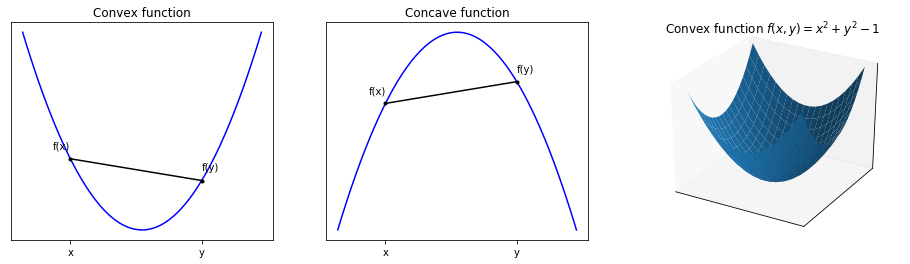

In [3]:
from mpl_toolkits.mplot3d import Axes3D
#fig, ax = plt.subplots(1,3, figsize=(12,4))
fig = plt.figure(figsize=(16,4))
ax = [0,1,2] 
ax[0] = fig.add_subplot(1,3,1)
ax[1] = fig.add_subplot(1,3,2)
ax[2] = fig.add_subplot(1,3,3, projection='3d')
xr = np.linspace(-1, 1, 100)
x = -0.6
y = 0.5
def con_plot(ax, f):
    ax.plot(xr, f(xr), 'blue')
    ax.plot([x, y], [f(x), f(y)], '.-k')
    ax.xaxis.set_ticks([x,y])
    ax.annotate('f(x)', [x, f(x)+0.05], horizontalalignment='right')
    ax.annotate('f(y)', [y, f(y)+0.05])
    ax.xaxis.set_ticklabels(['x', 'y'])
    ax.yaxis.set_ticks([])

con_plot(ax[0], lambda x: x**2)
ax[0].set_title('Convex function')
con_plot(ax[1], lambda x: -x**2)
ax[1].set_title('Concave function')

xr = np.linspace(-1, 1, 20)
xy = np.array(np.meshgrid(xr, xr)).T
ax[2].plot_surface(xy[...,0], xy[...,1], np.sum(xy**2, axis=2).T-1.0)
ax[2].set_title('Convex function $f(x,y)=x^2 + y^2 -1$');
ax[2].xaxis.set_ticks([])
ax[2].yaxis.set_ticks([])
ax[2].zaxis.set_ticks([]);

It is important to know the following properties of convex functions and convex sets:

* the intersection of two *convex* sets is *convex* itself (see if you understand why from the definition of a convex set)
* the union of two convex sets is not necessarily convex (try to find a counter example)
* if $h:\R^n\to\R$ is a *convex* function, then also the subset $X_h = \left\{\vec x\in\R^n |~h(\vec x)\leq 0\right\}$ is *convex*.
* if $f_1:\R^n\to\R$ is a *convex* function, then the function $f_2(\vec x)=-f_1(\vec x)$ is *concave*, and vice-versa.
* if $f:\R^n\to\R$ is a *convex* scalar-valued function, then the area above its graph is convex.

Note that the graph of a function $f:\R^n\to\R$ is really embedded in $\R^{n+1}$, as it is given by the collection of points $(\vec x, y)$ where $y=f(\vec x)$. For example, the graph of a one-dimensional function $f:\R\to\R$ is a figure in the 2-dimensional $x,y$-plane. To describe the area above the graph we therefore need a function $h(\vec x, y)=f(\vec x)-y$ such that

$$
  h(\vec x, y) = f(\vec x)-y \leq 0 \implies y\geq f(\vec x)
$$

describes the area above the graph in $\vec R^{n+1}$. As is worked out in the next example, the function $h(\vec x, y) = f(\vec x)-y$ is indeed convex, if $f$ is convex.

### Example 1 (\*) <a class="tocSkip"></a>
<div class="optional">
Suppose we want to restrict our optimisation of a function $f:\R^2\to \R$ to the area between the graphs $y=x^2$ and $y=1-x^2$ depicted as the grey area in the figure below:
</div>

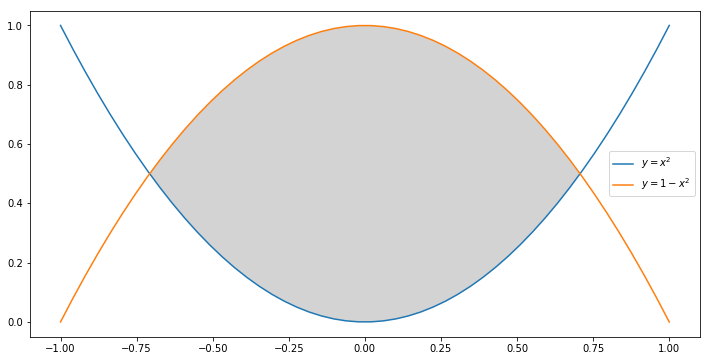

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
xr = np.linspace(-1, 1, 50)
ax.plot(xr, xr**2, label='$y=x^2$')
ax.plot(xr,1-xr**2, label='$y=1-x^2$')
ax.legend()

r = np.sqrt(2)/2.
x1 = np.linspace(-r, r, 50)
x2 = np.linspace(r, -r, 50)
x = np.hstack((x1, x2))
y = np.hstack((x1**2, 1-x2**2))
xy = np.hstack((x[:,np.newaxis], y[:,np.newaxis]))
from matplotlib.patches import Polygon
p = Polygon(xy, facecolor='lightgrey')
ax.add_artist(p);

<div class="optional">
For the area above the graph $y=x^2$ we need the inequality constraint $y \geq x^2$. We can write this constraint in the same form as before by defining $h_1(x, y) = x^2-y$ and imposing $h_1(x,y) \leq 0$, since

$$
 h_1(x, y) = x^2-y \leq 0 \implies x^2 \leq y \implies y \geq x^2
$$

Note that $y=x^2$ is the graph in the $x,y$-plane of a 1D-function $f(x)=x^2$ which itself is convex:

$$
  f\big((1-t) x_1 + t x_2\big) \leq (1-t) f(x_1) + t f(x_2)\;\;\;\text{for all}\;\;\; 0\leq t\leq1, x_1,x_2\in\R
$$

From this it follows that the 2D function $h_1(x, y)$ is also convex; Consider the values of $h$ along a lines between the points $(x_1, y_1)$ and $(x_2, y_2)$:

\begin{align*}
  h_1\big((1-t) x_1 + t x_2, (1-t) y_1 + t y_2\big) &= f\big((1-t) x_1 + t x_2\big) - \big((1-t) y_1 + t y_2\big) \\
  & \leq (1-t) f(x_1) + t f(x_2) - (1-t) y_1 - t y_2 \\
  &= (1-t) \big(f(x_1) - y_1\big) + t \big(f(x_2) - t y_2\big) \\
  &= (1-t) h_1(x_1, y_1) + t h_1(x_2, y2)
\end{align*}

If these two points were both above the graph, then $h_1(x_1, y_1) \leq 0$ and $h_1(x_2, y_2) \leq 0$, and any points on the line between $(x_1, y_1)$ and $(x_2, y_2)$ are also in the feasible set, since:

$$
  h_1\big((1-t) x_1 + t x_2, (1-t) y_1 + t y_2\big) 
  \leq (1-t) h_1(x_1, y_1) + t h_1(x_2, y2) \leq 0
$$

In other words we have proven that the area *above* the graph of a convex function is a convex set which is described by a convex inequality function $h_1(x,y) \leq 0$.

The 1D function corresponding to the graph $y=1-x^2$ is concave, but in this case we are interested in the area *below* the graph so the corresponding inequality constraint is expressed as

$$
  h_2(x, y) = y - (1-x^2) \leq 0 \implies y \leq 1-x^2
$$

Note that we need a minus sign in front of the $1-x^2$. It is this minus sign that means that although the 1D function corresponding to $y=1-x^2$ is concave, the function $h_2$ is convex. In other words the area *below* the graph of a concave function is a convex set described by a convex inequality function $h_2(x,y)\leq 0$.

Finally, the intersection between two convex sets is convex and we can describe the area between the two graphs (the grey area) using the convex vector-valued function

$$
  \vec h(x,y) = \begin{pmatrix}
  x^2 - y \\ y - (1-x^2)
  \end{pmatrix} \leq \vec 0
$$

</div>

## Convex Functions and the Hessian
We will state (without proof) the following two important results:
* any local minimum of a convex function is a global minimum. If the function is <a class="definition" href="#definitions" id="strictlyconvex">strictly convex</a> (this means the interpolated values along a line are strictly above (not equal) to the function values), then the global minimum is attained in a single point only.
* any stationary point of a continuously differentiable convex function is a local minimum, and thus by the previous point a global minimum
* functions with a convex domain which are twice continuously differentiable are convex if and only if the Hessian is Positive Semidefinite in the interior of its domain (i.e. not necessarily on the boundary).

As we discussed in the previous section a convex inequality function $\vec h$ lead to a feasible set that is convex (if we define the inequality as $\vec h(\vec x) \leq \vec 0$). This is in general not the case for *equality* constraints. For instance we looked at the equality constraint $g(x,y)=x^2+y^2-1=0$ which corresponds to the unit circle. In this case the equality function $g$ is convex, but the unit circle is not. Equality constraints in the form of a linear system $\mat A\vec x=\vec b$ with

$$
  \vec g(\vec x) = \mat A\vec x - \vec b = 0
$$

however do describe a convex set: since any linear combination of any two solutions to the linear system is also a solution, the line between the two solutions is also within the feasible set.

We therefore define a <a class="definition" href="#definitions" id="convexoptimisationproblem">convex optimisation problem</a> as the minimisation of a *convex* function $f:\R^n\to\R$ subject to a *convex* inequality constraint $\vec h: \R^n\to\R^q$ and a linear equality constraint $\mat A\vec x=\vec b, \mat A\in \R^{p\times n}, \vec b\in \R^p$ with the feasible set:

$$
  X = \{ \vec x\in\R^n | \vec h(\vec x)\leq 0\;\;\text{and}\;\;\vec A\vec x=\vec b\}
$$

# Equality Constraints and Lagrange Multipliers
In this section we will revise the Lagrange multiplier technique for optimisation with (only) equality constraints.
When adding equality constraints, we may also consider functions $f$ that are unbounded when no constraints are applied. For instance the function $f(x,y) = x+y$ is not bounded from below, and so it would not make much sense to try to minimize it in an unconstrained optimisation. If, however we restrict the minimsation to points on the unit circle, there is a well defined minimum.

In the figure below we have plotted the unit circle, and the contours (straight lines) of $f(x,y) = x+ y$. In addition, for a number of points on the circle, we have indicated the gradient of $f$ (blue arrows) and $g(x,y)=x^2+y^2-1$ (red arrows).

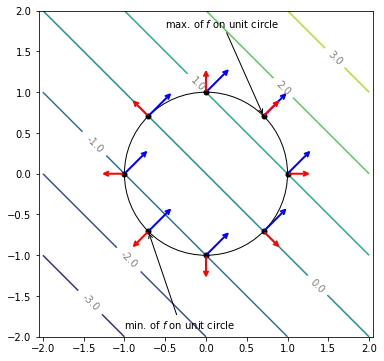

In [5]:
xr = np.linspace(-2, 2, 20)
# xy are the locations of the horizontal grid, it is a Nx x Ny x 2 array
x, y = np.array(np.meshgrid(xr, xr))

fig, ax = plt.subplots(1,1, figsize=(6,6))
c = ax.contour(x, y, x+y, np.arange(-4,5))
ax.clabel(c, np.arange(-4,5), fmt='%1.1f', colors='grey')

from matplotlib.patches import Circle
p = Circle((0,0), 1, fill=False, edgecolor='black', linewidth=1)
ax.add_artist(p)
ax.axis('equal')

c = np.array([-np.sqrt(2), -1., 0., 1., np.sqrt(2)])
x = 0.5 * c + 0.5 * np.sqrt(np.abs(2-c**2))
y = np.hstack((c-x, x[1:-1]))
x = np.hstack((x, c[1:-1]-x[1:-1]))
ax.plot(x,y, '.', color='black', markersize=10)
for xi, yi in zip(x,y):
    ax.annotate('', (xi+0.3, yi+0.3), xytext=(xi,yi), arrowprops={'arrowstyle':'->', 'linewidth': 2, 'color': 'blue'})
    ax.annotate('', (xi*1.3, yi*1.3), xytext=(xi,yi), arrowprops={'arrowstyle':'->', 'linewidth': 2, 'color': 'red'})
    
ax.annotate('min. of $f$ on unit circle', (x[0], y[0]), xytext=(-1., -1.9), arrowprops={'arrowstyle':'->', 'linewidth': 1, 'color': 'black'})
ax.annotate('max. of $f$ on unit circle', (x[4], y[4]), xytext=(-0.5, 1.8), arrowprops={'arrowstyle':'->', 'linewidth': 1, 'color': 'black'});

We have also indicated the minimum and maximum of $f$ on the unit circle. We see that in these two points the gradient of $f$ is in the same or opposite direction of the gradient of $g$, unlike any other points of the unit circle. The reason for this is that in a local minimum or maximum of $f$ on the unit circle, the only direction that $f$ can change is in a direction that takes us off the unit circle. For any (infinitisimal) direction along the circle, $f$ should remain constant if we are in a minimum or maximum.

To summarize, if $\vec x^*$ is a local minimum or maximum of $f(\vec x)$ restricted to the feasible set where $g(\vec x)=0$ (here the unit circle), then we must have

$$
  f'\vec(x) = -\lambda g'(\vec x)
$$

where $\lambda$ is a (positive or negative) scalar.

Although in our example a negative $\lambda$ ($f'$ and $g'$ are in the same direction) corresponds with the maximum, and a positive $\lambda$ with the minimum, this is not generally the case. In fact, we could have described the same optimisation problem using $g(x,y)=1-x^2-y^2$ which would have reverted all gradient vectors $g'(\vec x)$. $\lambda$ can also be zero, which means that $f'(\vec x)=0$; in other words the extremum of $f$ of the constrained problem coincides with an extremum of the unconstrained problem. The scalar $\lambda$ is called a <a class="definition" href="#definitions" id="Lagrangemulitplier">Lagrange mulitplier</a>.

If we have more than one equality constraint, this means we can leave the feasible set in more than one direction. 
For instance, for an optimisation in $\R^3$ restricted to the unit circle in the $z=0$-plane, we have $g_1(x,y,z)=x^2+y^2-1$ and $g_2(x,y,z)=z$. At any point on this unit circle, we can either go "outward" in the $z=0$-plane, or "up" in the $z$-direction. The different directions to leave the feasible set are given by $g_1'(\vec x), g_2'(\vec x), \dots$. Any linear combination of these directions are orthogonal to the feasible set, and again in a local minimum or maximum of $f$ on the feasible set, the gradient of $f$ should be in such a direction. Thus we can write

$$
  f'(\vec x) = -\sum_{j=1}^p \lambda_j g'_j(\vec x)
$$

if we have $p$ equality constraints. In vector form we can write $\vec g(\vec x)$ as a function $\vec g:\R^n\to\R^p$. In this case $\vec g'(\vec x)$ is a $p\times n$ matrix, and we write

<a name="lambda_equation"></a>
$$
  f'(\vec x) = -\vlam^T \vec g'(\vec x) \label{lambda_equation} \tag{lambda_equation}
$$

with $\vlam \in \R^p$ the $p$ Lagrange multipliers associated with the $p$ equality constraints.

The <a class="definition" href="#definitions" id="Lagrangian">Lagrangian</a> of an optimisation problem of a function $f:\R^n\to\R$ with equality constraints $\vec g:\R^n\to\R^p, \vec g(\vec x)=\vec 0$ is the function

$$
  L(\vec x, \vlam) = f(\vec x) + \vlam^T \vec g(\vec x)
$$

The reason that this function $L:\R^{n+p}\to \R$, of both $\vec x$ and $\vlam$, is useful, becomes clear by looking at its stationary points. For stationary points the derivatives in both the $\vec x$-directions and the $\vlam$ directions should be zero. If we look at the second condition:

$$
  \frac{\partial}{\partial\lambda} L(\vec x, \vlam) = \vec g(\vec x) = \vec 0
$$

in other words any stationary point of $L$ satisfies the constraints $\vec g(\vec x)=\vec 0$. The first condition gives

$$
  \frac{\partial}{\partial x} L(\vec x, \vlam) = \frac{\partial}{\partial x}f(\vec x) + \vlam^T \frac{\partial}{\partial x}\vec g(\vec x)
  = f'(\vec x) + \vlam^T \vec g'(\vec x) = 0
$$

which is exactly the same condition as [(lambda_equation)](#lambda_equation). Thus stationary points of $L$ are stationary points of $f$ when restricted to $\vec g(\vec x)=0$.

NOTE: some of the examples given here and in the tutorial are *not* convex optimisation problems (for instance when $g$ in non-linear). In those cases we will just use the techniques described below to identify stationary points - we will not go into conditions to identify which of those stationary points are actually local minima.

### Example <a class="tocSkip"></a>
Going back to the minimisation of $f(x,y)=x+y$ on the unit circle: $g(x,y)=x^2+y^2-1=0$, the Lagrangian is given by

$$
  L(x, y, \lambda) = f(x,y) + \lambda g(x,y) = x + y + \lambda\left(x^2+y^2-1\right)
$$

Its stationary points are given by the three equations

\begin{align*}
  \frac{\partial L(x, y, \lambda)}{\partial x} &= 1 + 2\lambda x = 0, \\
  \frac{\partial L(x, y, \lambda)}{\partial y} &= 1 + 2\lambda y = 0, \\
  \frac{\partial L(x, y, \lambda)}{\partial\lambda} &= x^2 + y^2 -1 = 0. \\
\end{align*}

From the first two equations we obtain 

$$
  x=y=-\frac{1}{2\lambda}\;\;\text{ and }\;\;\lambda\neq 0.
$$

By substitution in the third equation we get

$$
  \frac 1{4\lambda^2} + \frac 1{4\lambda^2} - 1 = \frac 1{2\lambda^2} -1 = 0 \implies
  \lambda = \pm\tfrac 12\sqrt{2}
$$

and therefore we identify $(-\tfrac 12\sqrt{2}, -\tfrac 12\sqrt{2})$ and $(\tfrac 12\sqrt{2}, \tfrac 12\sqrt{2})$ as stationary points of $f$ with the constraint.

Note that in this case we can not use convexity - $g(\vec x)=0$ does not describe a convex set. We will therefore not formally identify which of those are minima and maxima, although we can check with the solution we already saw in the figure above.

### Example <a class="tocSkip"></a>
Let us consider a cylindrical can with a height $h$ and radius $r$. The volume of the cylinder is given by $V=\pi r^2h$ and the surface area by $A=2\pi r^2+ 2\pi rh$. Suppose a manufacturer wants to make a one liter can, but they want to minimize the amount of tinplate needed, i.e. they want to minimize the area. In our standard formulation, we write 

$$
  \text{minimize}\;\; f(h,r)=2\pi r^2+ 2\pi rh\;\; \text{subject to}\;\;
  g(h,r) = \pi r^2h - 10^{-3} = 0
$$

(note that if we are using meters for $r$ and $h$ the volume should be in m$^3$ and one liter is $10^{-3}$ m$^3$).

<table><tr><td>
<img src="https://dr282zn36sxxg.cloudfront.net/datastreams/f-d%3Aa2c7a0bf6a3fa75986f82c601dbcd425a3530ab78b5e6652c4ed1ae3%2BIMAGE_TINY%2BIMAGE_TINY.1" width="200/"/></td><td>
<img src="https://upload.wikimedia.org/wikipedia/commons/6/6e/TAG_Andy_Warhol_Soup_Can_01.jpg" width="200/"/></td>
</tr></table>

The Lagrangian for this problem is given by:

$$
  L(h, r, \lambda) = 2\pi r^2+ 2\pi rh + \lambda \left(\pi r^2h - 10^{-3}\right)
$$

Stationary points of the Lagrangian are given by:

\begin{align*}
  \frac{\partial L(h, r, \lambda)}{\partial h} = 2\pi r +\lambda\pi r^2 &= 0 \implies \lambda=-\frac 2r \\
  \frac{\partial L(h, r, \lambda)}{\partial r} = 4\pi r + 2\pi h + 2\lambda\pi rh &= 0 \\
  \frac{\partial L(h, r, \lambda)}{\partial\lambda} = \pi r^2h - 10^{-3} &=0 
\end{align*}

Substitution of $\lambda=-\frac 2r$ into the second equation gives

$$
  4\pi r + 2\pi h - 4\pi h = 4\pi r -2\pi h =0 \implies h=2r
$$

Note that we obtain this result independent of the volume $V=10^{-3}$ m^3, thus the optimal ratio of height over radius that minimizes the surface area is always 2. For our case we can substitute in the third equation and obtain $r\approx 5.4$ cm and $h\approx 10.8$ cm.

### Example <a class="tocSkip"></a>
A cone in 3D, aligned with the $z$-axis, can be described by the following constraint

$$
  g_1(x, y, z) = x^2 + y^2 - z^2 = 0
$$

The constraint for a plane takes the following general form

$$
  g_2(\vec x) = \vec n^T\vec x - d
$$

where $\vec n$ is the normal vector to the plane and $d$ is the (orthogonal) distance between the plane and the origin (+ or - depending on the orientation of $\vec n$).

The intersection of a plane with a cone, is called a conic section, and can take the form of a circle, an ellipse, a parabola or a hyperbola (see figure below)

<a href="https://en.wikipedia.org/wiki/Conic_section">
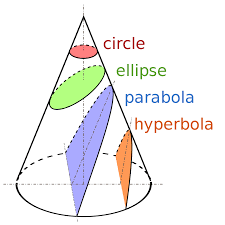</a>

As an example, let us consider an ellipse formed by intersecting the cone with a plane, and let us assume that the plane is  parallel to the $y$-axis as in the figure above. This means that $n_y$, the $y$-component of the plane normal $\vec n$, is zero. To ensure that the cross section is indeed an ellipse we also need $|n_x|\lt|n_z|$, i.e. the angle with the $x, y$-plane should be less than $45^\circ$.

We can find the maximum extent in the $y$-direction of this ellipse, by finding the minimum and maximum of the function $f(x,y,z)=y$. The Lagrangian for this problem is given by

$$
  L(x,y,z, \lambda_1, \lambda_2) = f(x,y,z) + \lambda_1 g_1(x,y,z) + \lambda_2 g_2(x,y,z) = y + \lambda_1(x^2+y^2-z^2) + \lambda_2(\vec n^T\vec x-d)
$$

The stationary points of $L$ are found by solving the following system of 5 equations

\begin{align*}
  \frac{\partial L}{\partial x} &= 2\lambda_1 x + \lambda_2 n_x = 0 \\
  \frac{\partial L}{\partial y} &= 1 + 2\lambda_1 y = 0 \\
  \frac{\partial L}{\partial z} &= -2\lambda_1 z + \lambda_2 n_z = 0 \\
  \frac{\partial L}{\partial\lambda_1} &= x^2 + y^2 -z^2 =0 \\
  \frac{\partial L}{\partial\lambda_2} &= n_x x + n_z z -d = 0
\end{align*}

The first three equations give us expressions for $x, y$ and $z$ respectively:

\begin{align*}
  x &= -\frac{\lambda_2 n_x}{2\lambda_1}, \\
  y &= -\frac 1{2\lambda_1}, \\
  z &= \frac{\lambda_2 n_z}{2\lambda_1},
\end{align*}

which we can subtitute in the fourth equation

$$
  \frac{\lambda_2^2 n_x^2}{4\lambda_1^2}
  + \frac 1{4\lambda_1^2} - \frac{\lambda_2^2 n_z^2}{4\lambda_1^2} =
  \frac 1{4\lambda_1^2}\left(\lambda_2^2 (n_x^2 -n_z^2)+1\right) = 0
  \implies \lambda_2 = \pm \frac 1{\sqrt{n_z^2-n_x^2}},
$$

and in the fifth equation

$$
  -\frac{\lambda_2 n_x^2}{2\lambda_1}
  +\frac{\lambda_2 n_z^2}{2\lambda_1} - d =0
  \implies \lambda_1 = \frac{\lambda_2(n_z^2-n_x^2)}{2d}
  \implies \lambda_1 = \pm\frac{\sqrt{n_z^2-n_x^2}}{2d}.
$$

So that finally we can substitute $\lambda_1$ in the second equation, to obtain

$$
  y = -\frac 1{2\lambda_1} = \pm\frac d{\sqrt{n_z^2-n_x^2}}.
$$

We get two stationary points, one with maximum $y$ and one with minimum $y$. As expected, we only get stationary points (the 5 equations only have a solution) if $|n_x|\lt|n_z|$. If $|n_x|\gt|n_z|$, the cross section is a hyperbola which does not have a minimum and maximum for $y$.

### Example <a class="tocSkip"></a>
We return to a problem we have encountered before, the solution of an underconstrained linear problem. We want to solve

$$
  \mat A\vec x = \vec b
$$

where $\mat A$ is a $m\times n$ matrix where $m\lt n$. This linear system does not have a unique solution, there is a whole vector space of solutions of dimension (at least) $n-m$. We can however make the solution unique by searching for the solution $\vec x$ with minimal l2 norm.

To put this in the standard constraint optimisation form, we write

$$
  \text{minimize}\;\;f(\vec x) = \tfrac 12\vec x^T\vec x\;\;
  \text{subject to}\;\;\vec g(\vec x) = \mat A\vec x-\vec b
$$

Note that, as usual, we do not actually minimize the l2-norm $\|\vec x\|=\sqrt{\vec x^T\vec x}$, but equivalently minimize the square of the l2-norm. We have also added a $\tfrac 12$ for convenience. The Lagrangian for this problem is

$$
  L(\vec x, \vlam) = \tfrac 12\vec x^T\vec x + \vlam^T\left(\mat A\vec x-\vec b\right),
$$

where $\vlam \in \R^m$ and the equations for stationary points are:

\begin{align*}
  \frac{\partial}{\partial\vec x} L(\vec x, \vlam) = \vec x^T +\vlam^T\mat A &= 0 \\
  \frac{\partial}{\partial\vlam} L(\vec x, \vlam) = \mat A\vec x-\vec b &= 0
\end{align*}

The first equation can be written

$$
  \vec x = -\mat A^T\vlam
$$

which we can substitute in the second equation:

$$
  \mat A\mat A^T\lambda = -\vec b
$$

The matrix $\mat A\mat A^T$ is invertible assuming that the rows of $\mat A$ are linearly independent ($\mat A$ has full row rank). After solving the normal equation for $\lambda$ we can find $\vec x$ by multiplying with the tranpose of $\mat A$.

We notice that $f(\vec x)$ is a convex function. The constraint is linear ($\vec g(\vec x)$ is affine to be precise), which in particular means that $\vec g$ is convex, and thus we are dealing with a convex optimisation problem, which guarantees that if we find a stationary point it is a minimum. In conclusion, assuming full row rank of $\mat A$, the solution

$$
  \vec x = \mat A^T \left(\mat A\mat A^T\right)^{-1}\vec b
$$

is the unique solution to $\mat A\vec x=\vec b$ with minimal l2-norm $\|\vec x\|$.

# Linear Programming (\*)

<div class="optional">
In this section and following sections, we return to the topic of *inequality constraints*. 
As we saw in the previous section adding constraints means that we can minimize functions that are not bounded from below without the constraints, in particular linear functions of the form

$$
  f(\vec x) = \vec c^T\vec x
$$

where $\vec c$ is any vector in $R^n$. As an example, in the optimisation on the unit circle we had $c=(1,1) \in \R^2$. We could include affine functions by adding an additional scalar constant $d\in\R$, but this would not affect the optimisation.

We have also considered equality constraints that are linear with affine functions of the form $\vec g(\vec x)=\mat A\vec x-\vec b$. If the function $f$ is also linear however, only adding linear equality constraints is not sufficient to pose a well defined optimisation problem. This is because a linear function $f$ restricted to the subspace defined by a linear system, is still linear within that subspace and thus unbounded from above and below (or constant).

Using multiple linear *inequality* constraints however it is very well possible to define a well-posed linear optimisation problem. For instance we could again look at minimizing $f(x,y)=x+y$ but add the constraints $x>0$ and $y>0$. This problem has a unique global minimum in the origin with $f(0,0)=0$. By adding multiple constraints we can in fact make the feasible area itself bounded (think for instance of the unit square we defined before using 4 linear inequality constraints). If the feasible area is bounded, that means a linear function is guaranteed to have a minimum and maximum within the feasible area.

Using only linear constraints however we do need quite a large number of constraints. For instance in two dimensions the minimum number of linear inequality constraints to obtain a bounded area is three. This is the triangular area enclosed by three lines. For instance let

$$
  \vec h(x, y) = \begin{pmatrix}
    y - (1 + \tfrac 12x) \\
    y - (2 - 2 x) \\
    x - 3 
  \end{pmatrix},
$$

then the area given by $\vec h(x, y)\leq 0$ is the triangle
</div>

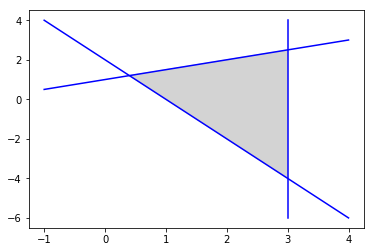

In [6]:
xr = np.linspace(-1, 4, 2)
yr1 = 1 + 0.5*xr
yr2 = 2 - 2*xr

fig, ax = plt.subplots(1,1)
ax.plot(xr, yr1, 'b')
ax.plot(xr, yr2, 'b')
ax.plot([3,3], [-6, 4], 'b')

p = Polygon([[2/5., 6/5.], [3, -4], [3, 2.5], [2/5., 6/5.]], color='lightgrey')
ax.add_artist(p);

<div class="optional">
In $n$ dimension the minimum number of linear inequality constraints to obtain a bounded feasible domain is $n+1$.
A $n$-dimensional hypercube (square in 2D, cube in 3D, etc.) already takes $2n$ inequalities. This means for linear optimisation with many degrees of freedom, the number of inequality constraints is typically very large as well.

Since the gradient of the linear function $f$ is constant, and thus nonzero, $f$ will not attain a minimum or maximum in the interior of the feasible domain, so we have to search for the minimum or maximum on boundaries only. In the example above the linear could obtain its minimum either somewhere on an edge, or in one of its vertices. If it attains a minimum in the middle of an edge however, its gradient should be orthogonal to that edge, and since the gradient is constant that implies that $f$ is constant along that edge, and the minimum would be attained in all points of the edge, including the vertices. So basically the minimum is always attained in one of the three vertices, and we only have to check these three points to know which one is the minimum. The same logic can be applied for finding the maximum.

This is true for any linear optimisation problem in two dimensions. Since inequality constraints are linear, they are convex and thus the feasible area is convex. A bounded feasible set takes the form of a convex polygon, and the maximum and minimum are always found in one of the vertices of that polygon. If the feasible set is not bounded in all directions, it is possible that a maximum or minimum does not exist - for instance the example $f(x,y)=x+y$ with $x>0$ and $y>0$ has no maximum - but a maximum or minimum that does exists is always found in a vertex (the origin in the example). The vertices are found as the intersections of the lines described as the boundary of each individual inequality constraint. Let us take a look at an example with 5 inequality constraints bounding a pentagon:
</div>

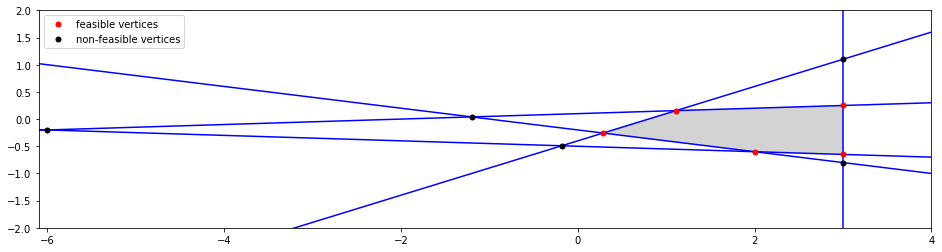

In [7]:
xr = np.linspace(-6.1, 4, 2)

# the constraints: h(x) = Ax-b <= 0
A = np.array([[-0.05, 1.], [1e5, -1.], [-.2, -1.], [-0.05, -1.], [-.5, 1.]])
b = np.array([.1, 3e5, .2, .5, -.4])

n = A.shape[0]

# each constraint i represents a line: A_i0 x + A_i1 y = b_i
# => y = -A_i0/A_i1 x + b_i/Ai1
fig, ax = plt.subplots(1,1, figsize=(16,4))
for i in range(n):
    ax.plot(xr, -A[i,0]/A[i,1]*xr + b[i]/A[i,1] ,'b')

# for each pair of lines we compute the intersection
fxy = []  # feasible intersections
oxy = []  # outside intersections
edges = [[] for i in range(n)]
for i in range(n):
    for j in range(i+1, n):
        # solve 2 x 2 system, comprising constraint i and j:
        xy = sl.solve([A[i,:],A[j,:]], [b[i], b[j]])
        if all((A @ xy -b) <= 1e-12):  # if all constraints are met
            fxy.append(xy)  # add to feasible list
        else:
            oxy.append(xy)  # not a feasible intersection
        
fxy = np.array(fxy)
oxy = np.array(oxy)

plt.plot(fxy[:,0], fxy[:,1], '.', markersize=10, color='red', label='feasible vertices')
plt.plot(oxy[:,0], oxy[:,1], '.', markersize=10, color='black', label='non-feasible vertices')
plt.legend()

ax.axis([xr[0],xr[1], -2, 2])

i = [0, 1, 4, 3, 2, 0]  # clock-wise order of vertices, worked out by hand
p = Polygon(fxy[i], color='lightgrey')
ax.add_artist(p);

<div class="optional">
The vertices are found by computing the intersection of each pair of the 5 lines. However not every intersection is in the feasible set. In the figure above intersections that are feasible are marked in red and intersection that are not are marked in black. So out of the ${5\choose 4}=10$ intersections, only 5 are feasible vertices.

In more than two dimensions the same reasoning applies. In three dimensions, the constraints correspond to planes. Two planes intersect in a line, three planes intersect in a single point. The feasible set is a polyhedron with faces, edges, vertices that coincide with some of these planes, lines and points. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/3dpoly.svg/440px-3dpoly.svg.png"/>

(figure from [wikipedia](https://en.wikipedia.org/wiki/Linear_programming): a polyhedron bounded by 5 planes)

In $n$ dimensions any combination of $n$ constraints (remember there are usually a lot more constraints than dimensions), is satisfied in a single point and each of these points is a potential vertex of the bound region. For each of these a $n\times n$ linear system needs to be solved. The number of combinations in a typical problem is very large. For instance the $n$ dimensional hypercube has 2^n vertices (4 for a square, 8 for a cube, etc.). So as you can imagine, simply going through all combinations by brute force, solving a $n\times n$ linear system and then checking whether the solution is actually inside the feasible set, and for those that are checking which are the minimum or maximum of the function, is going to be a very costly operation.

Luckily there are more efficient ways to proceed. For instance the *simplex algorithm* which starts at any feasible vertex and proceeds along the edges, but only those in negative gradient direction, to seek out vertices that have lower value. Several variants of this idea exists which we will not go into here. Although efficient for many linear optimisation problems, the algorithms based on jumping between vertices along edges are known to have worst cases in which a significant number of all vertices needs to be visited, leading to exponential complexity of the algorithm. For this reason alternative strategies, such as *interior point methods* discussed in the last section of this notebook, have been developed that are not based on jumping between vertices, but evaluate the function in a sequence of points in the interior of the feasible set.

The field of linear optimisation techniques is often referred to as *linear programming* and linear optimisation problems as *Linear Program (LP)*. The techniques of linear programming are widely used in finance and economics, and various business applications such as planning, routing and scheduling, and in various fields of science and engineering.
</div>

# Inequality Constraints and the KKT conditions (\*)

<div class="optional"/>
Let us return to the more general case: minimisation of a function $f(\vec x)$ under inequality constraints $\vec h(\vec x)\leq 0$ without making any assumptions about the linearity of $f$ and $\vec h$. In this case we should consider two cases:

1. the minimum of $f$ is attained in a point in the interior of the feasible set. Assuming $f$ is differentiable this means we should be looking for stationary points of $f$:

$$
  f'(\vec x) = 0
$$

where the derivatives should be zero in all $n$ directions just like for the unconstrained case.

2. the minimum of $f$ is attained in a point on the boundary. A boundary is identified by the fact that one of the inequality constraints is satisfied by being exactly zero. Let $i$ be this specific constraint for which $h_i(\vec x) = 0$. For $f$ to a local minimum in a point on that boundary, the gradient should be normal to it, otherwise we could still move along the boundary to attain a smaller value. Just like in the case of equality constraints this means that the gradient of $f$ should be a scalar multiple of the gradient of $g$:

<a name="mu-equation"></a>
$$
  f'(\vec x) = -\mu_i h_i'(\vec x) \tag{mu-equation} \label{mu-equation}
$$

In the case of inequality constraints $f'(\vec x)$ being normal is not enough: if the gradient is pointing out of the feasible domain (not inwards) we know that if we move from the domain boundary back into the interior, the value of $f$ further decreases. The point on the boundary can therefore not be a local minimum.
</div>

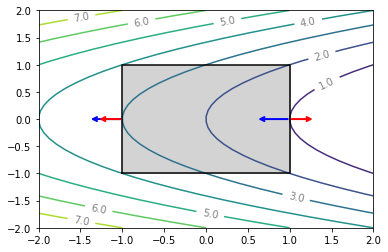

In [8]:
xr = np.linspace(-2, 2, 40)
xy = np.array(np.meshgrid(xr, xr)).T

z = xy[...,1]**2 - xy[...,0] + 2

c = plt.contour(xy[...,0], xy[...,1], z)
ax.clabel(c, fmt='%1.1f', colors='grey')

plt.plot([-1,1,1,-1,-1],[-1,-1,1,1,-1],'k')
from matplotlib.patches import Rectangle
p = Rectangle([-1,-1], 2, 2, color='lightgrey')
plt.gca().add_artist(p)

plt.annotate('', [0.6,0], xytext=[1,0], arrowprops={'arrowstyle':'->', 'linewidth': 2, 'color': 'blue'})
plt.annotate('', [1.3,0], xytext=[1,0], arrowprops={'arrowstyle':'->', 'linewidth': 2, 'color': 'red'})
plt.annotate('', [-1.4,0], xytext=[-1,0], arrowprops={'arrowstyle':'->', 'linewidth': 2, 'color': 'blue'})
plt.annotate('', [-1.3,0], xytext=[-1,0], arrowprops={'arrowstyle':'->', 'linewidth': 2, 'color': 'red'});

<div class="optional"/>
In the figure above we have plotted the contours of $f(x,y)=y^2-x+2$ and a feasible area described by

$$
  \vec h(x,y) = \begin{pmatrix}
    x-1 \\ y-1 \\ 1-x \\ 1-y
  \end{pmatrix} \leq 0 \implies
  \begin{array}{l}
    x \leq 1 \\ y \leq 1 \\ x \geq -1 \\ y \geq -1
  \end{array}
$$

For two points we have also indicated the gradients of $f$ (in blue) and $\vec h$ (in red). The point $(1,0)$ lies on the boundary described by $h_1(x, y) = x-1 = 0$, and the point $(-1,0)$ on the boundary described by $h_3(x,y)=1-x=0$. For the point $(-1, 0)$ the gradient of $f$ and the gradient of $h_3$ are in the same direction, which means that it is not a local minimum, because $f$ still decreases by going into the opposite (positive $x$) direction. In the point $(1,0)$ however the gradients of $f$ and $h_1$ are opposite, which means the only direction in which $f$ decreases is by leaving the feasible area: $(1,0)$ is indeed a local minimum. Note that if we were to minimize $f$ on the *boundary* of the square only, i.e. use $\vec h(x,y)$ as an *equality* constraint $\vec h(x,y)=0$ then $(-1,0)$ would have been a local minimum, because moving along the boundary only $f$ increases in all directions.

The gradient of $f$ to be opposite can be guaranteed by requiring a $\mu_i>0$ in [(mu-equation)](#mu-equation). A local minimum can also be found on the intersection of two boundaries. For instance if we flip the sign of $f$: $f(x,y) = -y^2+x-2$ the corners $(-1, -1)$ and $(-1,1)$ would be local minima (or equivalently we could look for maxima of the original $f$). In this case we need

$$
  f'(\vec x) = -\mu_i h_i'(\vec x) - \mu_j h_j'(\vec x)
$$

in the corner between constraints $i$ and $j$ with both $\mu_i>0$ and $\mu_j>0$.

We can generalize this to an intersection of an abitrary number of inequality constraints in higher dimension by writing

$$
  f'(\vec x) = -\vmu^T \vec h'(\vec x)
$$

where $\vmu$ is now a $q$-dimensional vector, $\vec h'$ a $q\times n$ matrix with $q$ the number of inequality constraints and $n$ the number of dimensions of $\vec x$. If we are at an intersection that involves a subset of the $q$ constraints, we simply set $\mu_i$ zero for the constraints that are not involved, and require $\mu_j>0$ for constraints that are involved. To ensure we are actually on such an intersection, we need to ensure $h_j(\vec x)=0$ for constraints $j$ that *are* involved. We can write this compactly by requiring

$$
  \vmu^T \vec h(\vec x) = 0
$$

Note that we already assume that $\vec x$ is feasible, $\vec h(\vec x)\leq 0$, so that this requirement indeed implies that $h_j(\vec x) = 0$ for all $\mu_j>0$.

In summary we require:

\begin{align*}
  \vec h(\vec x) & \leq\vec 0 & \text{feasibility: }\vec x\text{ adheres to all inequality constraints} \\
  \vmu^T \geq 0, \;\vmu^T \vec h(\vec x) &= 0 & \text{ positive $\mu_i$ only if $h_i(\vec x)=0$} \\
  f'(\vec x) &= -\vmu^T \vec h'(\vec x) &  \text{the gradient of $f$ points outward only}
\end{align*}

Note that the three requirements also include case 1 of a local minimum in the interior of the feasible set. In this case we simply have $\vmu=\vec 0$, so that $f'(\vec x)=\vec 0$.</div>

## Karush-Kuhn-Tucker conditions (\*) <a class="tocSkip"></a>
<div class="optional"/>
Now we are ready to write down the conditions for finding a local minimum $\vec x^*$ in the general optimisation problem

\begin{align*}
  \text{minimize}\;\; f(\vec x)& \\
  \text{subject to:}\;\; \vec g(\vec x) &= \vec 0 \\
  \vec h(\vec x) &\leq \vec 0
\end{align*}

where $f:\R^n\to\R, \vec g:\R^n\to\R^p, \vec h:\R^n\to\R^q$ are continuously differentiable. Then for each local minimum the following conditions hold:

\begin{align*}
  f'(\vec x^*) + \vlam^T\vec g'(\vec x^*) + \vmu^T\vec h'(\vec x^*) &= \vec 0 \\
  \vec g(\vec x^*) &= \vec 0 \\
  \vec h(\vec x^*) &\leq \vec 0 \\
  \vmu &\geq \vec 0 \\
  \vmu^T \vec h(\vec x) &= 0 
\end{align*}

These condition are called the **Karush-Kuhn-Tucker (KKT) conditions**. The first two terms in the first equation combined with the second equation are the Lagrange multiplier formulation for equality constraints we saw previously. The third term in the first equation and the last three equations embed the inequality constraints. Note that again these are necessary conditions only, i.e. any local minimum satisfies these conditions, not every point that satisfies these conditions is guaranteed to be a minimum. For a convex optimisation problem $f, \vec g, \vec h$ (remember the <a href="#convexoptimisationproblem">definition</a>) however any point that satisfies the KKT conditions is a (local and global) minimum.
</div>

# Quadratic Programming
In this section we will step up from linear programming which optimizes linear functions, to a functions that are quadratic. In lecture 2 we saw that any quadratic function $f:\R^n\to\R$ can be written

$$
  f(\vec x) = \tfrac 12 \vec x^T \mat H \vec x - \vec r^T\vec x + c
$$

where we can always choose $\mat H$ to be symmetric for any function $f$. The scalar constant $c$ is irrelevant for minimisation so we'll set $c=0$. We already know that the solution to the unconstrained minimisation of $f$ is given by the linear system

$$
  \mat H\vec x=\vec r
$$

but now we want to add some equality constraints (linear for now): $\mat A\vec x=\vec b$, where $\mat A$ is a $p\times n$ matrix and $\vec b\in \R^p$ encodintg $p$ linear equality constraints. We'll write down the KKT conditions for this problem. Since we have no inequality constraints these are the first two conditions only with $\vec g(\vec x)=\mat A\vec x-\vec b$, and are the Lagrange multiplier formulation for equality constraints

\begin{align*}
  f'(\vec x^*) + \vlam^T\vec g'(\vec x^*) = \mat H\vec x - \vec r + \mat A^T\vlam = \vec 0 \\
  \vec g(\vec x^*) = \mat A\vec x-\vec b = \vec 0
\end{align*}

Combined these two equations form a linear system that we can write as a single matrix system

<a name="KKT-system"></a>
$$
  \begin{pmatrix}
    \mat H & \mat A^T \\
    \mat A & 0
  \end{pmatrix}
  \begin{pmatrix}
    \vec x \\ \vlam
  \end{pmatrix}
  =
  \begin{pmatrix}
    \vec r \\ \vec b
  \end{pmatrix}
  \label{KKT-system} \tag{KKT-system}
$$

The matrix in this system is referred to as a <a class="definition" href="#definitions" id="KKTmatrix">KKT-matrix</a> This name refers to the more general (including inequality constraints) KKT equations described in the (optional) section 4. Here we just deal with the special case of equality constraints only, the same way as section 2. The system is symmetric, but unfortunately it is not semidefinite or positive definite, even if $\mat H$ is. In fact we can show that the matrix always has both negative and positive values. For this reason the system here is also refered to as a *saddle point system* (remember the 2D saddle point system in lecture 2 for a quadratic function with $\mat H=\left(\begin{smallmatrix} 1 & 0 \\ 0 & -1 \end{smallmatrix}\right)$?). This means that the system is hard to solve (see section 6 for more details). It is a system however that comes back in very many applications in science and engineering, in particular in fluid flows (\*), not just in optimisation problems.

<div class="optional">
(*) A well known example is incompressible flow, where the incompressible Navier Stokes equations can be related to an energy minimisation principle, where the pressure acts like a Lagrange multiplier that enforces the incompressibility constraint</div>

# Summary of Constrained Optimisation Algorithms

In the following optional sections, we go into more detail
about algorithms to solve general optimisation problems of the form:

\begin{align*}
  \text{minimize}\;\; f(\vec x)& \\
  \text{subject to:}\;\; \vec g(\vec x) &= \vec 0 \\
  \vec h(\vec x) &\leq \vec 0
\end{align*}

The details can get quite involved, and this will not be examined, so you are free to skip the rest of this notebook. We just summarize the main point here.

Constrained optimisation algorithms for problems of the form above, fall into broadly two categories:

## Sequential Quadratic Programming
Remember that for unconstrained problems, Newton's method can be seen as a sequence of quadratic minimisation problems based on the quadratic approximation

$$
  f_{\text{quad}}(\vec x^{(k)}+\vec p) = f(\vec x^{(k)}) + f'(\vec x^{(k)})\vec p + \tfrac 12 \vec p^T f''(\vec x^{(k)})\vec p
$$

of $f(\vec x)$ around $\vec x=\vec x^{(k)}$ (see lecture 4 when we discussed the trust region method). *Constrained problems* can be solved by a sequence of quadratic minimisation problems with linearized constraints.

<div class="optional">
In section 8 below we derive that this quadratic minimisation problem with linearized constraints takes the following form:

\begin{align*}
  & \text{minimize } & f_{\text{quad}}(\vec x^{(k)}+\vec p) &= f(\vec x^{(k)}) + f'(\vec x^{(k)})\vec p + \tfrac 12 \vec p^T\frac{\partial^2 \mathcal{L}(\vec x^{(k)}, \vlam^{(k)}, \vmu^{(k)})}{\partial\vec x^2} \vec p \\
  & \text{subject to} & \vec g_{\text{lin}}(\vec x^{(k)}+\vec p) &= \vec g(\vec x^{(k)}) + \vec g'(\vec x^{(k)}) \vec p = \vec 0 \\
  & & \vec h_{\text{lin}}(\vec x^{(k)}+\vec p) &= \vec h(\vec x^{(k)}) + \vec h'(\vec x^{(k)}) \vec p \leq \vec 0,
\end{align*}

where $\mathcal{L}$ is the Lagrangian:

$$
  \mathcal{L}(\vec x^{(k)}, \vlam^{(k)}, \vmu^{(k)}) = f(\vec x) + \vlam^T \vec g(\vec x) + \vmu^T \vec h(\vec x)
$$

</div>

This constrained quadratic problem has the same form as in section 5. We therefore need to solve the KKT-system to get the minimum of the quadratic approximation. This minimum, just like in the unconstrained case, is the next iterate $\vec x^{(k+1)} = \vec x^{(k)}+\vec p$ in the algorithm. This approach is called <a class="definition" href="#definitions" id="SequentialQuadraticProgramming">Sequential Quadratic Programming</a>. An implementation is available in python under the name [SLSQP](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-slsqp.html) from scipy.

## Interior Point/Penalty Methods
An alternative approach seeks a solution to the constrained optimisation problem through a <a class="definition" href="#definitions" id="SequenceofUnconstrainedMinimizationProblemsSUMT">Sequence of Unconstrained Minimization Problems (SUMT)</a>. The unconstrained problems employ a penalty term that keeps the solution away from the boundary imposed by the inequality constraint $h(\vec x)\lt 0$. <a class="definition" href="#definitions" id="Interiorpenaltymethods">Interior penalty methods</a> prevent the solution from actually leaving the feasible domain by ramping up the penalty term to infinity already *inside the domain* (usually a $\log$-term). Since depending on the scaling of the penalty term this will always keep the solution at some distance from the feasible boundary, this requires a sequence in which the scaling is subsequently turned down to enable local minima that are very close or at the feasible boundary. For more details see section 9 below. A popular implementation of this method is found in [Ipopt](https://projects.coin-or.org/Ipopt) with python binding via [pyipopt](https://code.google.com/archive/p/pyipopt/).

# Solving the KKT system (\*)
<div class="optional">
There are a various different approaches to solving the KKT system:

* Use a direct solver on the entire system. This may work very well for systems that are not too large, and which have a sparsity structure that means that the fill-in (see lecture 5) can be limited. Because the system is not positive definite, we cannot use a Cholesky ($\mat L^T\mat L$) decomposition, but a variant to this, the $\mat L^T\mat D\mat L$-decomposition may work very well.
* Depending on the complexity of the constraints, it may be possible to explicitly work out the null space of the constraint matrix $\mat A$, i.e. find a basis for the subspace of vectors for which $\mat A\vec v=0$. If $\mat F$ is the matrix whose columns are this basis, then any vector in the nullspace can be written $\mat F\vec z$ where $\vec z\in R^{n-p}$ are the coefficients with respect to that basis. Let $\vec{\hat x}$ be any feasible point, i.e. $\mat A\vec{\hat x}=\vec b$. Then the difference between the solution $\vec x^*$ (which should also be feasible) and $\vec{\hat x}$ should be in the nullspace
$$
  \mat A \left[\vec x^* - \vec{\hat x}\right] = \mat A\vec x^* - \mat A\vec{\hat x} = 0
  \implies \vec x^* - \vec{\hat x} = \mat F\vec z
$$
for some $\vec z\in\R^{n-p}$. This means we now only need to work out $\vec z$:
\begin{align*}
  \mat H \vec x^* = \mat H \left[\vec{\hat x} + \mat F\vec z\right] = \vec r
  &\implies \mat H\mat F\vec z = \vec r - \mat H\vec{\hat x} \\
  &\implies \mat F^T\mat H\mat F\vec z = \mat F^T\vec r - \mat F^T\mat H\vec{\hat x}
\end{align*}
In other words we have reduced the system to only the degrees of freedom that stay within the feasible subspace, resulting in a system with matrix $\mat F^T\mat H\mat F$.
* Solve the Lagrange multiplier vector $\vlam$ first via a *Schur decomposition*. Here we symbolically rewrite the first equation of the KKT system by premultiplying with the inverse of $\mat H$
$$
  \mat H^{-1}\left(\mat H\vec x - \vec r + \mat A^T\vlam\right) = 0
  \implies \vec x = \mat H^{-1}\vec r - \mat H^{-1}\mat A^T\vlam
$$
and substitute the result for $\vec x$ into the second equation
$$
  \mat A\left(\mat H^{-1}\vec r - \mat H^{-1}\mat A^T\vlam\right) = \vec b
  \implies \mat A\mat H^{-1}\mat A^T~\vlam = \mat A\mat H^{-1}\vec r - \vec b 
$$
The last equation is a linear system with matrix $\mat A\mat H^{-1}\mat A^T$ that we can solve for $\vlam$. In some cases it is feasible to explicitly construct the matrix $\mat H^{-1}$, for instance if $\mat H$ is diagonal (see example below). In many cases however this becomes too expensive: if $\mat H$ is sparse, $\mat H^{-1}$ in general is not. In this case, when we write for instance $\vec y=\mat H^{-1}\vec r$ - what we really mean is *solve* $\vec y$ in $\mat H\vec y=\vec r$ by any of the various methods we have discussed for solving linear systems. This allows us to compute the matrix vector-product of $\mat H^{-1}$ with any vector. As a result we can also compute the matrix vector product of $\mat A\mat H^{-1}\mat A^T$ with any vector without explicitly assembling that matrix. $\mat A\mat H^{-1}\mat A^T$ is positive definite or SPD when $\mat H$ is. Thus for SPD $\mat H$ we can use conjugate gradients to solve for $\vlam$. We do have to keep in mind however that this requires a matrix vector product with $\mat A\mat H^{-1}\mat A^T$, and thus a solve with matrix $\mat H$ in every iteration of CG. For relatively small matrices with good structure, it may be advantageous to use a direct decomposition method (Cholesky) as this method is efficient at solving multiple times with the same matrix. In other cases we also need an iterative solver for $\mat H$, and thus we end up with an iteration for $\mat H$, within an iteration for solving with $\mat A\mat H^{-1}\mat A^T$.
</div>

### Example (\*) <a class="tocSkip"></a>
<div class="optional">
We have already seen an example of quadratic programming; When we first introduced the Lagrange mulitiplier approach, we were looking at the least squares solution to an underconstrained problem $\mat A\vec x=\vec b$. To put this example in the same form as above, we use $\mat H=\mat I$ (the identity matrix) and $\vec r=\vec 0$. Here $\mat H$ is easily invertible: $\mat H^{-1}=\mat I$ and thus we can immediately check that the Schur decomposition approach gives the same answer as before.

We can also generalize this by searching for a solution to $\mat A\vec x=\vec b$ that minimize a weighted least squares error. Say $\vec{\hat x}$ is some vector of expected values, then the weighted least squares error for a sample $\vec x$ is

$$
  f(\vec x) = \sum_{i=1}^n w_i (x_i-\hat x_i)^2
$$

where $w_i$ are the weights. In statistics the weights are often chosen as $w_i=1/\sigma_i^2$ where $\sigma_i^2$ is the variance of the $i$-th variable. In vector form, we write

$$
  f(\vec x) = \tfrac 12\left[\vec x-\vec{\hat x}\right]^T\mat H \left[\vec x-\vec{\hat x}\right]
   = \tfrac 12\vec x^T \mat H\vec x^T - \vec r^T\vec x + c
$$

with (check these expression for yourself!):

$$
  \mat H=\begin{pmatrix}
    2w_1 & 0 & 0 & \dots & 0\\
    0 & 2w_2 & 0 & \dots & 0\\
    0 & 0 & 2w_3 & \dots & 0\\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \dots &2w_n
  \end{pmatrix},
  \;\;
  \vec r = \mat H\vec{\hat x},
  \;\;
  c = \tfrac 12\vec{\hat x}^T\mat H\vec{\hat x}
$$

The matrix $\mat H$ in this case is a little less trivial, but it is still diagonal so we can still easily invert it and explicitly assemble the Schur matrix $\mat A\mat H^{-1}\mat A^T$.
</div>

# Newton's method with equality constraints (\*)

<div class="optional">
As we have seen a couple of times now, to find the minimum of $f:\R \to \R^n$ subject to $p$ equality constraints $\vec g(\vec x)=0, \vec g:\R^n\to\R^p$, we should search for stationary points of the Lagrangian

$$
  L(\vec x, \vlam) = f(\vec x) + \vlam^T \vec g(\vec x)
$$

this leads to the first two equations of the KKT conditions

\begin{align*}
  f'(\vec x) + \vlam^T \vec g'(x) = 0 \\
  \vec g(x) = 0
\end{align*}

We can recognize this as a root-finding problem and apply Newton's method. This means we write $\vec F(\vec x, \vlam)=\nabla L(\vec x, \vlam)$ where $\nabla=(\nabla_{\vec x}, \nabla_{\vlam})$ includes derivatives with respect to both $\vec x$ and $\vlam$:

\begin{align*}
  \vec F_{\vec x} &= \nabla_{\vec x} L(\vec x, \vlam) = f'(\vec x) + \vlam^T \vec g'(x) = 0 \\
  \vec F_{\vlam} &= \vec g(x) = 0
\end{align*}

Newton's method is then described by the search direction obtained from the following equation:

$$
  \nabla \vec F(\vec x, \vlam) \vec p = -\vec F(\vec x, \vlam)
$$

where $\vec p = (\vec p_{\vec x}, \vec p_{\vlam})$ is a vector in $\R^{n+p}$ that contains both a search direction for $\vec x$ and for $\vlam$. Writing out this equation in $\vec x$ and $\vlam$ components

$$
  \begin{pmatrix}
    \nabla_{\vec x} \vec F_{\vec x} & \nabla_\vlam \vec F_{\vec x} \\
    \nabla_{\vec x} \vec F_{\vlam} & \nabla_{\vlam} \vec F_{\vlam}
  \end{pmatrix}
  \begin{pmatrix}
    \vec p_{\vec x} \\ \vec p_\vlam
  \end{pmatrix}
  =
  \begin{pmatrix}
    -\vec F_{\vec x} \\ -\vec F_\vlam
  \end{pmatrix}
$$

or

$$
  \begin{pmatrix}
    \nabla_{\vec x}^2 L(\vec x, \vlam) && \vec g'(\vec x)^T \\
    \vec g'(\vec x) && 0
  \end{pmatrix}
  \begin{pmatrix}
    \vec p_{\vec x} \\ \vec p_\vlam
  \end{pmatrix}
  =
  \begin{pmatrix}
    -f'(\vec x) - \vlam^T \vec g'(x) \\ -\vec g(\vec x)
  \end{pmatrix}
$$
    
</div>

<div class="optional">
    
This linear system can be recognized to be the same as 
<a href="#KKT-system">(KKT-system)</a>, with 

\begin{align*}
  \mat H &=\nabla_{\vec x}^2 L(\vec x, \vlam) \\
  \mat A & =\vec g'(\vec x) \\
  \vec r &= -f'(\vec x) - \vlam^T \vec g'(\vec x) \\
  \vec b &= -\vec g(\vec x)
\end{align*}

In other words at each iteration $\vec x=\vec x^{(k)}$ (also using $\vlam^{(k)}$ from the previous iteration) we are solving the following quadratic program (optimisation problem):

\begin{align*}
  & \text{minimize } & \tfrac 12 \vec p_{\vec x}^T\nabla_{\vec x}^2 L(\vec x^{(k)}, \vlam^{(k)})\vec p_{\vec x} + f'(\vec x^{(k)})\vec p_{\vec x} + (\vlam^{(k)})^T \vec g'(\vec x^{(k)})\vec p_{\vec x} \\
  & \text{subject to} & \vec g'(\vec x^{(k)}) \vec p_{\vec x} = -\vec g(\vec x^{(k)})
\end{align*}

For a known $\vec x^{(k)}$ and $\lambda^{(k)}$, this is an optimisation problem with only $\vec p_{\vec x}$ as the unknown. Writing down the KKT system for this, bring us back to the equation before, and reveals $\vec p_\vlam$ to be the Lagrange multiplier for this local optimisation problem. The third term in the function we are minimizing can be substituted via the equality constraint and is thus revealed to be constant, so we can leave it out. We can thus write the equivalent optimisation problem

\begin{align*}
  & \text{minimize } & f_{\text{quad}}(\vec x^{(k)}+\vec p_{\vec x}) &= f(\vec x^{(k)}) + f'(\vec x^{(k)})\vec p_{\vec x} + \tfrac 12 \vec p_{\vec x}^T\nabla_{\vec x}^2 L(\vec x^{(k)}, \vlam^{(k)})\vec p_{\vec x} \\
  & \text{subject to} & \vec g_{\text{lin}}(\vec x^{(k)}+\vec p_{\vec x}) &= \vec g(\vec x^{(k)}) + \vec g'(\vec x^{(k)}) \vec p_{\vec x} = \vec 0
\end{align*}

This is very similar to unconstrained Newton which we could describe as a sequence of minimisation problems of a quadratic approximation of the function $f$:

$$
  f_{\text{quad}}(\vec x^{(k)}+\vec p) = f(\vec x^{(k)}) + f'(\vec x^{(k)})\vec p + \tfrac 12 \vec p^T f''(\vec x^{(k)}, \vlam^{(k)})\vec p
$$

which is just the quadratic approximation via a Taylor's series.

In the constrained case we have nearly the same idea: we solve a sequence of *constrained* minimisation problems, constrained under the linearisation of the equality constraints around $\vec x^{(k)}$. In this case however we are dealing with a modified Hessian:

$$
  \mat H =\nabla_{\vec x}^2 L(\vec x, \vlam) = f''(\vec x) + \lambda^T \vec g''(\vec x)
$$

In the case the constraints on the original problem are linear however, $\vec g''(\vec x)=0$ and thus the expression for $f_{\text{quad}}$ is exactly the same as in the unconstrained case, and $\vec g_{\text{lin}}=\vec g$.

It should be clear from the above why the approach described in this section is often referred to as *Sequential Quadratic Programming (SQP)*.
</div>

# Inequality Constraints: SQP and SUMT (\*)

<div class="optional">
We can follow the same approach as in the previous section to include *inequality constraints* to the idea of Sequential Quadratic Programming. We are then solving a sequence of quadratic optimisations (minimization of a quadratic approximation to the function $f$ in $\vec x^{(k)}$) subject to linearized equality *and inequality* constraints:

\begin{align*}
  & \text{minimize } & f_{\text{quad}}(\vec x^{(k)}+\vec p_{\vec x}) &= f(\vec x^{(k)}) + f'(\vec x^{(k)})\vec p_{\vec x} + \tfrac 12 \vec p_{\vec x}^T\nabla_{\vec x}^2 L(\vec x^{(k)}, \vlam^{(k)})\vec p_{\vec x} \\
  & \text{subject to} & \vec g_{\text{lin}}(\vec x^{(k)}+\vec p_{\vec x}) &= \vec g(\vec x^{(k)}) + \vec g'(\vec x^{(k)}) \vec p_{\vec x} = \vec 0 \\
  & & \vec h_{\text{lin}}(\vec x^{(k)}+\vec p_{\vec x}) &= \vec h(\vec x^{(k)}) + \vec h'(\vec x^{(k)}) \vec p_{\vec x} \leq \vec 0
\end{align*}

There are a number of practical problems with the SQP method in its basic form that we have glossed over:
* it is not guaranteed that all local quadratic programs are actually feasible, i.e. we may end up in a situation in which there are no feasible points adhering to the linearised constraints
* we have no guarantee of global convergence - after all we are applying Newton's method to a function (the Lagrangian) whose Hessian is indefinite everywhere
* it is not immediately obvious how one should define "sufficient progress" in the line search method (similar to Armijo rule). Although we are searching for stationary points of the Lagrangian, we are not actually minimizing the Lagrangian, so it cannot be used as a measure of sufficient decrease. Using decrease in $f$ only is not right either since it would allow to arbitrarily increase a violation of the constraints

Simply feeding the KKT system to a generic Newton solver will therefore not give the desired result. There a number of constrained nonlinear optimisation solver packages available based on Sequential Quadratic Programming (SQP) that implement various techniques to deal with the problems above:
* [SNOPT](https://web.stanford.edu/group/SOL/snopt.htm) (fortran)
* [NLOpt](https://nlopt.readthedocs.io/en/latest/) (c/c++ with a.o. python interface)
* [SLSQP](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-slsqp.html) (available in scipy!)

An alternative approach, in particular popular for inequality constraints, is based on the use of penalty functions. The idea is to add a penalty term to the objective function (the function $f$ we are minimizing), that increases rapidly as soon as we violate the constraints. That is, we allow for the function to be evaluated everywhere but the penalty term should be sufficiently high outside the feasible area that the minimum will not be found there. This also means that inside the feasible area the penalty should be close to zero in order for it not to change the location of the minimum.

One of the problems with this approach is that we need the objective function and thus the penalty term to be smooth for our optimisation algorithms to work properly, at the very least it should be differentiable: so immediately jumping from no penalty inside the feasible area to a very high value outside is not possible.

Let us look at the following example:

$$
  \text{minimize: }\;\;f(x)=\exp(-x)\;\;\text{with}\;\;x\leq 1
$$

The minimum in this case is actually found at the boundary $\vec x^*=1$ with $f(1)=\exp(-1)$. We could try the following penalty term

$$
  p(x) = \nu \max(x-1, 0)^2
$$

where $p(x)=0$ for $x\leq 1$, and $\nu$ is a penalty parameter that is set to a high value so that $p(x)$ ramps up rapidly for $x\gt 1$.</div>

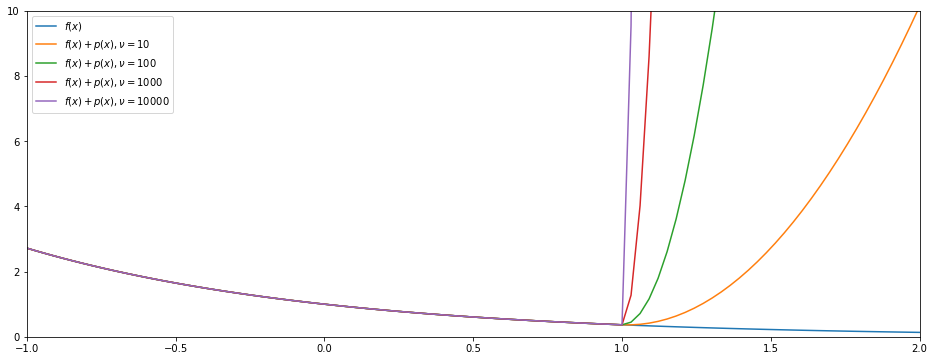

In [9]:
xr = np.linspace(-1, 2, 100)

plt.figure(figsize=(16,6))
plt.plot(xr, np.exp(-xr), label='$f(x)$')

for nu in [10, 100, 1000, 1e4]:
    plt.plot(xr, np.exp(-xr) + nu * np.maximum(xr-1,0)**2, label=r'$f(x)+p(x), \nu={:0.0f}$'.format(nu))

plt.axis([xr[0], xr[-1], 0, 10])
plt.legend();

<div class="optional">
The location of the minimum for $f(x)+p(x)$ can be computed with the standard (unconstrained) Newton method:
</div>

In [10]:
def fp(x):  # function plus penalty
    return np.exp(-x) + nu * np.maximum(x-1,0)**2

def fp_prime(x):  # first derivative
    return -np.exp(-x) + 2*nu * np.maximum(x-1,0)

def fp_hess(x):  # second derivative
    return np.exp(-x) - 2*nu * (np.maximum(x-1,0)-x)

print('Exact answer: x={}, f(x)={}'.format(1, np.exp(-1)))

for nu in [1, 10, 100, 1000, 1e4, 1e5, 1e6, 1e8]:
    xp = sop.newton(fp_prime, 0.0, fprime=fp_hess)
    print('nu={} : x={}, f(x)={}'.format(nu,xp, np.exp(-xp)))

Exact answer: x=1, f(x)=0.36787944117144233
nu=1 : x=1.157184951483814, f(x)=0.314369902967628
nu=10 : x=1.0180646742295483, f(x)=0.3612934845909643
nu=100 : x=1.001836023128435, f(x)=0.36720462568696016
nu=1000 : x=1.0001839058960968, f(x)=0.36781179219387167
nu=10000.0 : x=1.0000183936337297, f(x)=0.3678726745939759
nu=100000.0 : x=1.0000018393938226, f(x)=0.3678787644968931
nu=1000000.0 : x=1.0000001839396868, f(x)=0.36787937350381933
nu=100000000.0 : x=1.0000000018393973, f(x)=0.3678794404947659


<div class="optional">
From the experiment above, we see that for small vallues of $\nu$ the answer is not very accurate. But increasing $\nu$ we do converge to the right answer. Having large values of $\nu$ as a penalty parameter however may lead to other problems. We can already see this if we make the problem just a little more complicated. Let us consider the same function in 2D with a very simple variation in the y-direction: $f(x,y)=\exp(-x)+y^2$. We keep the same inequality constraint in $x$ only: $x\leq 1$, so we use the same penalty function $p(x,y)=\nu\max(1-x, 0)^2$. Now let us try the same experiment, now using $(x_0, y_0)=(0,1)$ as an initial guess
</div>

In [11]:
def fp(xy):
    return np.exp(-xy[0]) + xy[1]**2 + nu * np.maximum(xy[0]-1,0)**2

def fp_prime(xy):
    return np.array([-np.exp(-xy[0]) + 2*nu * np.maximum(xy[0]-1,0), 2*xy[1]])

def fp_hess(xy):
    return np.array([[np.exp(-xy[0]) - 2*nu * (np.maximum(xy[0]-1,0)-xy[0]), 0], [0, 2]])

print('Exact answer: x,y={}, f(x)={}'.format((1,0), np.exp(-1)))

x0 = np.array([0,5])

for nu in [1, 10, 100, 1000, 1e4, 1e5, 1e6, 1e8]:
    xy = sop.fmin_ncg(fp, x0, fprime=fp_prime, fhess=fp_hess, disp=False)
    print('nu={} : (x,y)={}, {}'.format(nu, xy, np.exp(-xy[0])+xy[1]**2))

Exact answer: x,y=(1, 0), f(x)=0.36787944117144233
nu=1 : (x,y)=[1.15718495 0.        ], 0.31436990296764333
nu=10 : (x,y)=[1.01806467 0.        ], 0.3612934845909754
nu=100 : (x,y)=[ 1.00183602e+00 -2.16840434e-19], 0.36720462568696016
nu=1000 : (x,y)=[1.00018391 0.        ], 0.36781179219387167
nu=10000.0 : (x,y)=[ 1.00001843 -0.00260044], 0.3678794232085791
nu=100000.0 : (x,y)=[1.00000184e+00 4.33680869e-19], 0.3678787644968931
nu=1000000.0 : (x,y)=[ 0.69074549 -0.01253732], 0.5013594706013645
nu=100000000.0 : (x,y)=[ 0.50249377 -0.02487511], 0.6056387681484522


<div class="optional">
As before, small values of $\nu$ lead to a not so accurate answer, but for $\nu\approx 1000$ we get a fairly good result. However this this as we further increase $\nu$ the result gets *less* accurate. The reason for this is that the Hessian for this problem, for $x>1$ is given by:

$$
  f''(x, y) = \begin{pmatrix}
    \exp(-x) + 2\nu & 0 \\
    0 & 2
  \end{pmatrix}
$$

from which it is easy to see that the condition number of $f''\approx \nu$. Thus if we choose a value of $\nu$ that is too large, the Hessian becomes ill-conditioned. One of the consequences is that the curvature in the $y$-direction becomes neglible with respect to the curvature in the $x$-direction which means that it will be harder to exactly find the minimal value along the boundary.

This example is still relatively simple. In situations with many dimensions the problem and its associated Hessian typically already show a wide range of values/eigenvalues, thus we would need a penalty value large enough to be stronger than the features associated with those. At the same time this wide range means that we are already much closer to being ill-conditioned without the penalty, thus finding a penalty parameter that is strong enough but maintains an acceptible conditioning of the system will be very hard.
</div>

<div class="optional">
Another problem is that very often the function $f(x)$ cannot actually be evaluated everywhere outside the feasible region. Consider for instance the minimisation of $f(x)=1/(1+\log(x))$ with constraints $0\leq x\leq\exp(-1)$. As soon as $x$ is only slightly less than zero, the function can no longer be evaluated. So we would have to construct a continuation of $f$ outside the feasible region. In many practical applications this is not really feasible (!).

A better approach is found using an *interior penalty* function, these are penalties that ramp up rapidly already inside the domain, in such a way that the optimisation algorithm will be kept away from the boundaries, and never cross into the infeasible region. Of course we also need this ramp to quickly decrease to (near) zero going into the interior, to avoid the algorithm being kept too far away from the boundary, so that we still get a fairly accurate answer in the case that the real minimum is on or near the boundary. A popular choice are so called *logarithmic barrier* functions. In our example this would look like $p(x)=-\nu\log(x-1)$ which indeed ramps up rapidly for values just below 1. Note that in this case we actually want a *small* value of $\nu$ as this will ensure that the penalty function remains small inside the feasible region.
</div>

In [12]:
def fp(xy):
    if xy[0]>=1.:
        # to avoid a warning when we take the log of
        # a negative number, we just return np.inf - which means
        # the line search will always reject this point:
        return np.inf
    else:
        return np.exp(-xy[0]) + xy[1]**2 - nu * np.log(1-xy[0])

def fp_prime(xy):
    if xy[0]>=1.:
        return [np.inf, np.inf]
    else:
        return np.array([-np.exp(-xy[0]) + nu/(1-xy[0]), 2*xy[1]])

def fp_hess(xy):
    if xy[0]>=1.:
        return [[0, 0], [0,0]]
    else:
        return np.array([[np.exp(-xy[0]) + nu/(1-xy[0])**2, 0], [0, 2]])

print('Exact answer: x,y={}, f(x)={}'.format((1,0), np.exp(-1)))

x0 = np.array([0,5])

for nu in [10**-a for a in range(1,10)]:
    xy = sop.fmin_ncg(fp, x0, fprime=fp_prime, fhess=fp_hess, disp=False)
    print('nu={} : (x,y)={}, {}'.format(nu, xy, np.exp(-xy[0])+xy[1]**2))

Exact answer: x,y=(1, 0), f(x)=0.36787944117144233
nu=0.1 : (x,y)=[0.78152077 0.        ], 0.4577094112599511
nu=0.01 : (x,y)=[9.73527344e-01 1.49797514e-18], 0.37774823752905207
nu=0.001 : (x,y)=[ 9.97289078e-01 -3.37110062e-18], 0.36887808648811815
nu=0.0001 : (x,y)=[9.99728246e-01 2.16521013e-19], 0.3679794274414719
nu=1e-05 : (x,y)=[ 9.99972824e-01 -1.73447498e-18], 0.36788943865635143
nu=1e-06 : (x,y)=[0.99489312 0.01561511], 0.3700067956551769
nu=1e-07 : (x,y)=[0.99487713 0.0156137 ], 0.37001266381079434
nu=1e-08 : (x,y)=[0.99487493 0.01561351], 0.37001346950403285
nu=1e-09 : (x,y)=[0.99486278 0.01561251], 0.37001793022576773


<div class="optional">
This has nicely kept the solution strictly within the feasible region, but for large values of $\nu$ the conditioning related problems haven't quite gone away. Interior penalty methods are generally better behaved in these situations.

There is another advantage to the use of logarithmic barrier functions. For the general minimisation of $f(\vec x)$ under inequality constraints $\vec h(\vec x)\leq 0$, let us 

$$
  \text{minimize:}\;\; f_{\text{penalized}}(\vec x) = f(\vec x) - \sum_{i=1}^q \nu\log(-h_i(\vec x))
$$

The minimum is found by searching for roots of

$$
  f_{\text{penalized}}'(\vec x) = f'(\vec x) + \nu\sum_{i=1}^q \frac{h'_i(\vec x)}{h_i(\vec x)} = 0
$$

Comparing this equation with the first equation of the KKT conditions, we see that one way to interpret this equation is to say that we have approximate Lagrange multipliers:

$$
  \mu_i = \nu\frac 1{h_i(\vec x)}
$$

or

$$
  \mu_i h_i(\vec x) = \nu
$$

Now compare this equation, with the last of the five KKT conditions (remenber we already assume each $h_i(\vec x)<0$):

$$
  \vmu^T\vec h(\vec x) =0 \implies \mu_i h_i(\vec x) =0 \;\; \text{for all}\;i
$$

That last condition says that $\mu_i$ can only be nonzero if $\vec h_i(\vec x)=0$, i.e. we are on the boundary associated with the $i$-th constraint. Using the penalty approach however, we seem to have relaxed this *complementary* condition somewhat with a small parameter $\nu$. Thus we should expect the solution of the penalized optimisation for $\nu\to 0$ to converge to the original minimisation problem with inequality constraints. What is more we can avoid the ill-conditioning problem of the Hessian, by avoiding to solve the unconstrained minimisation of $f_{\text{penalized}}$ and instead solve a modified set of KKT conditions in which we have relaxed the last condition.

There are many variations on this approach. The underlying idea of solving an unconstrained, but penalized minimisation problem with a penalty parameter $\nu$, which is then subsequently driven down further is often referred to as *Sequential Unconstrained Minimisation Techniques (SUMT)*. As these methods always stay within the interior of the feasible region the term Interior Point method is also often used. Many optimisation packages combine a number of techniques and we have to refer to the documentation and literature references therein for more details. Some noteworthy packages in this context:
* [Ipopt](https://projects.coin-or.org/Ipopt) available in python via [pyipopt](https://code.google.com/archive/p/pyipopt/)
* [CVXOPT](https://cvxopt.org/examples/index.html) for convex problems only, not as extensive but has nice python interface
* [KNITRO](https://www.artelys.com/en/optimization-tools/knitro) C++ library with various interfaces for other languages, offers both interior penalty and sequential quadratic programming algorithms.
</div>

# List of Definitions
<a id="definitions"/>

* <a class=definition href="#Inequalityconstraints">Inequality constraints</a>
* <a class=definition href="#Equalityconstraints">Equality constraints</a>
* <a class=definition href="#feasiblepoints">feasible points</a>
* <a class=definition href="#feasiblesubset">feasible subset</a>
* <a class=definition href="#convexset">convex set</a>
* <a class=definition href="#concave">concave</a>
* <a class=definition href="#convexfunction">convex function</a>
* <a class=definition href="#concavefunction">concave function</a>
* <a class=definition href="#strictlyconvex">strictly convex</a>
* <a class=definition href="#convexoptimisationproblem">convex optimisation problem</a>
* <a class=definition href="#Lagrangemulitplier">Lagrange mulitplier</a>
* <a class=definition href="#Lagrangian">Lagrangian</a>
* <a class=definition href="#KKTmatrix">KKT-matrix</a>
* <a class=definition href="#SequentialQuadraticProgramming">Sequential Quadratic Programming</a>
* <a class=definition href="#SequenceofUnconstrainedMinimizationProblemsSUMT">Sequence of Unconstrained Minimization Problems (SUMT)</a>
* <a class=definition href="#Interiorpenaltymethods">Interior penalty methods</a>